# Guerra Mundial RS

## Imports
We start importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

And initializing the visualization set

In [2]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline

## Shapefile structure

We will use a variable to configure the shapefile path

In [3]:
shp_path = "./Municipio.shp"
sf = shp.Reader(shp_path)

This is a record example structure

In [4]:
sf.records()[231]

Record #231: ['Carlos Barbosa', '4304804', 1959, 'Carlos Barbosa', 'Sim']

## Helper functions

We will use a function to convert a shapefile to a Pandas DF object

In [15]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    df = df.assign(owner=df.geocodigo)
    df = df.assign(center=[get_city_centre(sf, city_name) for city_name in df['nome']])
    return df

We have some function to compute data for each city, such as their XY coordinates and their center

In [6]:
def get_city_coordinates(sf, city_name):
    """
    From a city_name, return its XY coordinates
    """
    # Fetch the shape coordinates
    shape = sf.shape(df[df.nome == city_name].index.to_numpy()[0])
    x_lon = [point[0] for point in shape.points]
    y_lat = [point[1] for point in shape.points]
    
    return x_lon, y_lat

In [7]:
def get_city_centre(sf, city_name):
    """
    From a city_name, return its center coordinates
    """
    
    # Fetch the shape information
    x_lon, y_lat = get_city_coordinates(sf, city_name)
    
    # Return the city center
    return np.mean(x_lon), np.mean(y_lat)
    

We also use a function to plot a single shape

In [8]:
def plot_city(sf, city_name):
    """ Plots a single shape """
    
    # Configure the plot
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    
    # Fetch and plot the shape
    x_lon, y_lat = get_city_coordinates(sf, city_name)
    plt.plot(x_lon,y_lat) 
    
    # Configure the text plotting
    x_center, y_center = get_city_centre(sf, city_name)
    plt.text(x_center, y_center, city_name, fontsize=10)

And a function to plot a map, and cities, by color

In [9]:
def plot_map_fill(sf, cities, title, 
                              x_lim = None, 
                              y_lim = None, 
                              figsize = (11,9)):
    '''
    Plot map with lim coordinates, and the cities asked with their correspondent color
    '''
    
    # Configure the plot
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    # Plot all the cities in the map
    for shape in sf.shapeRecords():
        x = [point[0] for point in shape.shape.points[:]]
        y = [point[1] for point in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    
    # Plot the cities
    for city_name, color in cities:
        x_lon, y_lat = get_city_coordinates(sf, city_name)
        ax.fill(x_lon, y_lat, color)
        
        x_center, y_center = get_city_centre(sf, city_name)
        plt.text(x_center, y_center, city_name, fontsize=10)
    
    # Configure the map size
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

# Experiments

Here we have some space to test some stuff

In [16]:
df = read_shapefile(sf)
df

,nome,geocodigo,anoDeRefer,nomeAbrev,d_geometri,coords,owner,center
0,Quaraí,4315305,1875,Quaraí,Sim,"[(-56.04483493099997, -30.049016369999947), (-...",4315305,"(-56.139744860368275, -30.277528926007495)"
1,Tuparendi,4322301,1959,Tuparendi,Sim,"[(-54.582405377999976, -27.589248864999945), (...",4322301,"(-54.559122271563005, -27.686690801921934)"
2,Turuçu,4322327,1995,Turuçu,Sim,"[(-52.20587021299997, -31.376959297999974), (-...",4322327,"(-52.11795457770213, -31.553730516174838)"
3,Bom Jesus,4302303,1913,Bom Jesus,Sim,"[(-50.71894901999997, -28.26114945699993), (-5...",4302303,"(-50.517930127111434, -28.50676956560769)"
4,Capão da Canoa,4304630,1982,Capão da Canoa,Sim,"[(-49.991792000999965, -29.606068998999945), (...",4304630,"(-50.01279731865671, -29.644739373324153)"
5,Chuvisca,4305447,1995,Chuvisca,Sim,"[(-51.97663894899995, -30.660451812999952), (-...",4305447,"(-52.012816626406, -30.78654048226133)"
6,Coronel Bicaco,4305900,1963,Cel. Bicaco,Sim,"[(-53.73567824199995, -27.660281673999975), (-...",4305900,"(-53.67358112523211, -27.843061892520428)"
7,Forquetinha,4308433,1996,Forquetinha,Sim,"[(-52.16307645099994, -29.329481055999963), (-...",4308433,"(-52.1489944520316, -29.393849310823484)"
8,Fortaleza dos Valos,4308458,1982,Fortaleza dos Valos,Sim,"[(-53.284034314999985, -28.724480907999975), (...",4308458,"(-53.33885093078541, -28.8895100584575)"
9,Frederico Westphalen,4308508,1954,Frederico Westphalen,Sim,"[(-53.32702393799997, -27.221732372999952), (-...",4308508,"(-53.28712898107338, -27.33042438073956)"


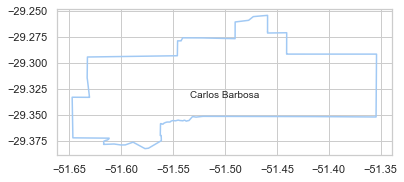

In [12]:
plot_city(sf, 'Carlos Barbosa')

In [ ]:
plot_map_fill(sf, [('Carlos Barbosa', 'r'), ('Porto Alegre', 'g')], 'RS')

In [ ]:
get_city_centre(sf, 'Carlos Barbosa')

# Guerra testing

Here we try some testing seeing who will win this war